# The Singleton DP & the Composite DP #

### Richard Mather ###

### March, 2022 ###

## Singleton is a 'Creational' DP and Composite is a 'Structural DP' ##

## Both Singleton and Composite have object-level scope ##

## There is no special relationship between these two patterns apart from the fact they are frequently implemented ##

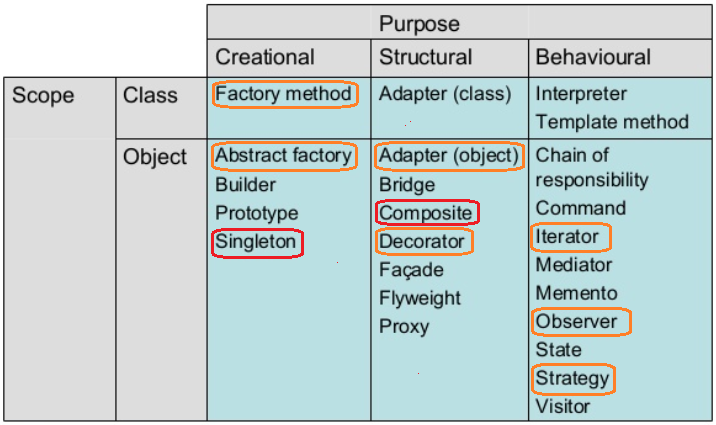

## At the end of this unit there are <font color="red">two logbook exercises for you to complete</font>  ##


## The Singleton Design Pattern ##
### An object scope creational pattern ###

### Intent: ### 
"Ensure a class has only one instance, and provide a global point of access to it" (Gamma et al., 1995) 
- The GoF explain the ***motivation*** behind Singleton is that for some classes there should only be one instance. Examples include: [1] a system that may have many printers that should be served by only one spooler; [2] a digital filter that should have only one A/D (analogue/digital) converter; [3] under certain circumstances many other patterns may be implemented with singleton - such as Abstract Factory, Builder and Protoype. 
- It is possible to implement a working 'single' entity solution using a global variable.
- However, this doesn't prevent multiple objects being instantiated.
- A singleton class keeps track of its one-only instance.
- It also ensures that no other instances are created by intercepting requests to construct more instances and redirecting these to reference the existing single instance.


### Structure ###

This is the generalised structure for Singleton as presented in Gamma et al. (1995)

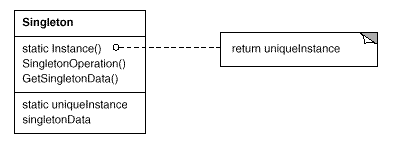

### Consequences ###

These are mainly beneficial ...
- ***Controlled access to a single instance*** - as well ensuring instantiation of one object it is also possible to control how and when clients access it
- ***Avoids need for global variables*** for which control of instances is less straightforward
- ***Can be subclassed***, for example, if an application requires an extended version at run time
- ***Possible to vary the number of instances***, the basic pattern may be modified to control a specified number of instances

## The trouble with singletons ##

- Singletons are contentious and are considered by many as anti-patterns i.e. they are often regarded as being best avoided. 
- The singleton pattern is hotly debated and the issues are complex including concerns over: 
 - imposing a one-only structure; 
 - difficulties in testing 'hidden' constructors; 
 - thread-safety questions
- However, others regard that those opposed to singletons are concerned that they are used to wrap global variables, which, the protagonists maintain is simply a wrong use of the DP as the Singleton pattern should ***only*** be used to ensure that a single instance of a given class exists at runtime.
- Dusty Philips (2015) explains reasons behind Pythonic disapproval of singletons ... 
 - implementation isn't transparent and it isn't obvious that only one instance has been created
 - when we call a constructor we expect a 'new' object - singleton violates that contract
 - developers shouldn't be forced into a specific mindset
 - we can't anticipate when more than one instance may be required
 - singletons can interfere with: (1) distributed computing; (2) parallel computing; (3) automated testing
 - ... Dusty Philips therefore recommends the use of module variables instead of singletons



## Singleton Implementation in a Static Language##


**ASIDE - Revision of keywords/modifiers used in conventional and statically typed languages**
Nicely summarised by Bozhidar Bozhanov (a.k.a. Bozho) at https://stackoverflow.com/questions/5083232/usage-patterns-for-private-static-final-public-abstract-keywords-in-java

Sources tell what do these keywords mean because when/why/where they are used follows from that. My explanations have the "when" word, for example, but they follow directly from the semantics of the keywords.

    private - should be used when something is not used outside of a given class
        for methods and fields - when they are used only within the same class
        for classes - only on nested classes, when used in the same class
    protected - should be used when
        for methods and field - when you need to make them accessible to subclasses only
        for classes - again only nested classes, accessible by subclasses
    public - is used when something is accessible by every other class

The above three are "visibility modifiers". They are used when you want to limit the usage of some methods/fields/classes to a group of objects, and hide them from other objects. There is another visibility modifier - the default one (when no other is present). It is used when you want your class/method/field to be accessible only to classes from the same package.

    static - is used when you don't need an instance of a class (i.e. object) to use it:
        for fields - when you want to have a global field
        for methods - when you need utility functions that do not depend on object state
        for nested classes - when you want to access them without an instance of the 
            enclosing class.
    abstract - when you don't want to provide implementations in the current class:
        on methods - when subclasses have to provide the actual implementation, but you want 
            to invoke these methods 
        (no matter how they are implemented) in this class.
        on classes - to denote that the class may have abstract methods.
    final - when you don't want something to change:
        on fields, when you want to assign the value only once. 
        It is useful when you want to pass a local variable to an inner class 
            - you have to declare it final.
        on classes and methods - when you don't want subclasses to be able to 
            extend / override them.


### The *conventional* singleton implementation in a ***statically typed*** language - such as Java - is to:###
- make the constructor private (below ... ``` private Singleton() { } ```)
- add a field to hold its result (below ... ``` private static Singleton singleton = new Singleton( ); ```)
- and a static accessor method (below ... ```    public static Singleton getInstance( ) {return singleton;} ```
- The full class (adapted from https://www.tutorialspoint.com/java/java_using_singleton.htm) is as follows ...

```
// File Name: Singleton.java
public class Singleton {

   private static Singleton singleton = new Singleton( );

   /* A private Constructor prevents any other class from instantiating */
   private Singleton() { }

   /* Static 'instance' method */
   public static Singleton getInstance( ) {
      return singleton;
   }

   /* Other methods protected by singleton-ness */
   protected static void demoMethod( ) {
      System.out.println("demoMethod for singleton");
   }
}

```

- An implementation with checks to see if multiple objects were essentially just aliases for one object ...

```
class Main {
  public static void main(String[] args) {
    // Create one instance of singleton
    Singleton tmp1 = Singleton.getInstance();
      // Call its demoMethod()
      tmp1.demoMethod();
    // Try to create another instance of singleton
    Singleton tmp2 = Singleton.getInstance();
      // Call its demoMethod()
      tmp2.demoMethod();
    // Check to see if the identy hash codes for both are the same
    System.out.println(System.identityHashCode(tmp1));
    System.out.println(System.identityHashCode(tmp2));
    // Double check to see if both aliases have the same memory address
    if (tmp1 == tmp2)
      System.out.println("They are equal and have the same memory address");
  }
}
```
- The output confirming that both aliases are the same object

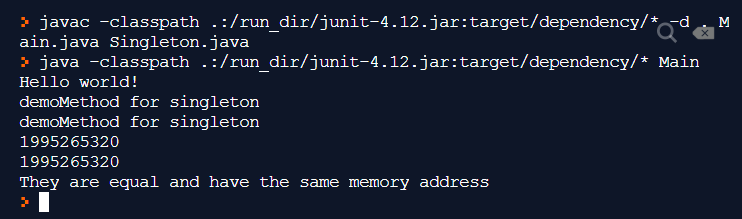


### Singleton Implementation "2" in a Static Language###

- Magee (undated) in lecture notes (https://www.doc.ic.ac.uk/~jnm/se_third_yr/patterns1-notes.pdf) expands the GoF printer spooler example with an example of a Java implementation
- So in Java ... make constructor private (we can’t do this in Python)
- ‘Static’ ensures that only one instance of an object, property or method exists. Even if many instances are created, they all reference the same object, property, method.
- Synchronised ensures that multiple threads/calls do not interleave … i.e. current call locks others until completed

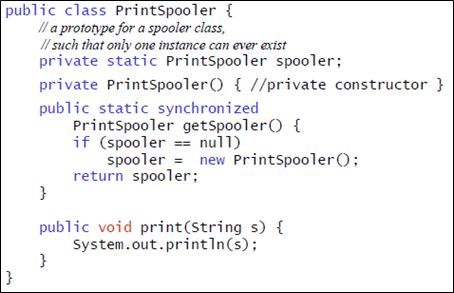

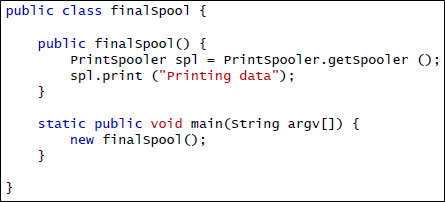


### Singleton Implementation in a Dynamic Language ###

- Constructors can't be made private in Python
- We can instead of ```__init___``` use the ***class method*** ```__new__``` which is always called before ```__init__``` and, unlike ```__init__``` (which only initialises an instance) ***constructs*** an instance of the object
- The following example overrides ```__new__``` to only instantiate an object (with a ```super``` call) if it doesn't already exist
- If the singleton already exists, a reference to the existing object is returned

In [1]:
## SINGLETON - Extended from Dusty Philips (2015) ##

class OneOnly:
    _singleton =  None
    def __new__(cls, *args, **kwargs):
        if not cls._singleton:
            cls._singleton = super(OneOnly, cls).__new__(cls, *args, **kwargs)
        return cls._singleton

## CODE TO BE IMPLEMENTED FOR LOGBOOK EX 14 BELOW HERE ##

## The <font color="red">"Borg"</font> variation on the Singleton DP</font> ##

- Alex Martelli (Fellow of the Python Software Foundation, engineer at Google and author of O'Reilly Python books) suggests that instead of a single object what is needed is that all 'singleton' objects maintain single record of their state information. 
- Martelli achieves this ***below*** by setting the value of the Borg ```self.__dict__``` dictionary to that of ```_shared_state```
- ```_shared_state``` is effectively static and is only created once, when the first singleton is instantiated 
- Every time a new singleton is instantiated ```_shared_state``` is updated for all singleton objects as their individual ```__dict__``` values are reset to the same value of the ```_shared_state``` static storage
- Why the "Borg" name? Very likely a reference to further contraction of Star Trek cyborg ("cybernetic organism") ... an alien group endowed, like the Borg Singleton, with a state of collective consciousness.

*References: https://dev.to/denisnutiu/comment/f44p; https://python-3-patterns-idioms-test.readthedocs.io/en/latest/Singleton.html; Martelli A & Ascher D (2002) Python Cookbook. O'Reilly Media (https://www.oreilly.com/library/view/python-cookbook/0596001673/ch05s23.html#:~:text=The%20Borg%20design%20nonpattern%20makes,Python%20makes%20this%20a%20snap.&text=The%20Singleton%20design%20pattern%20is,certain%20class%20is%20ever%20created.&text=Typically%2C%20what%20we%20really%20want,but%20all%20with%20shared%20state.)

In [9]:
# Singleton/BorgSingleton.py
# Alex Martelli's 'Borg'

class Borg:
    _shared_state = {}
    
    def __init__(self):
        self.__dict__ = self._shared_state
        print("Value of self._shared_state is ..."+str(self._shared_state))

class Singleton(Borg):
    def __init__(self, arg):
        # Here the 'static' Borg class is updated with the state of the new singleton object 
        Borg.__init__(self)
        self.val = arg
    def __str__(self): 
        return self.val
    
## CODE TO BE IMPLEMENTED FOR LOGBOOK EX 15 BELOW HERE ##

## The Composite Design Pattern ##
### An object scope structural pattern ###

### Intent: ### 
"Compose objects into tree structures to represent part-whole hierachies. Composite lets clients treat individual objects and compositions of objects uniformly" (Gamma et al., 1995) 
- The GoF explain the ***motivation*** behind Composite using the following example ... "*Graphics applications like drawing editors and schematic capture systems let users build complex diagrams out of simple components, which in turn can be grouped to form still larger components. A simple implementation could define classes for graphical primitives such as Text and Lines plus other classes that act as containers for these primitives ... The composite pattern describes how to use **recursive** composition so that clients don't have to make this distinction*" [i.e. the distinction between primitive and container objects] 

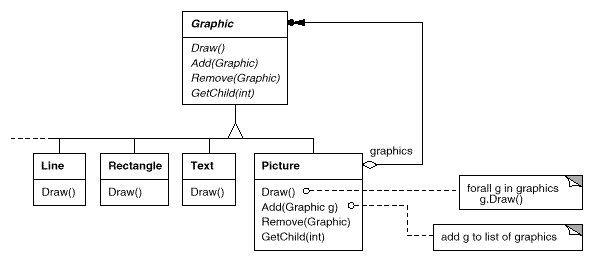

- The GoF summarise that ... "*The **key** to the Composite pattern is an abstract class that represents **both** primitives and their containers*"


### Structure ###

This is the generalised structure for Composite as presented in Gamma et al. (1995)

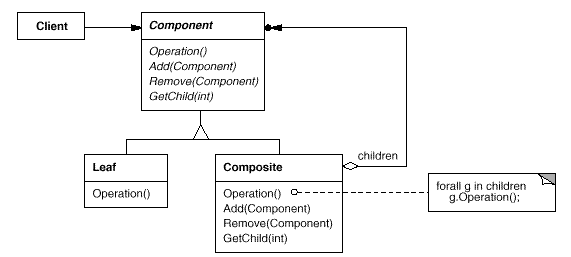

### Consequences ###

These are mainly beneficial ...
- ***Defines class hierarchies*** recursively so that primitive objects can be assembled into progressively more complex compositions
- ***Makes the client simple*** as they can polymorphically treat primitive and different levels of composite objects in the same way 
- ***Makes it easy to add new kinds of components*** providing they exploit the same uniform interface

### Implementation ###

- This is a short and very relevant example (exploiting the ubiquitous Composite structure of GUI widgets) by Brandon Rhodes (https://python-patterns.guide/gang-of-four/composite/) 
- Brandon Rhodes explains ... " ... *the authors of Tk chose, happily, to implement the Composite Pattern. Instead of making winfo_children() a special method that only Frame widgets offer, they made it a general method that is available on every single widget object! You never need to check whether it is present. For containers, it returns their list of child widgets. For other widgets? It simply returns an empty list* "

In [3]:
from tkinter import Tk, Frame, Button

# a polymorphic routine that treats all widgets in the same way.

def print_tree(widget, indent=0):
    """Print a hierarchy of Tk widgets in the terminal."""
    print('{:<{}} * {!r}'.format('', indent * 4, widget))
    # Returns a list containing widget instances for all children of this widget.
    # NOTE: winfo_children() "is available on every single widget object"
    for child in widget.winfo_children():
        # Recursively call print_tree() again for the next nested child widget
        print_tree(child, indent + 1)

# A small sample GUI application with some widgets.
root = Tk()
f = Frame(master=root)
f.pack()

tree_button = Button(f)
tree_button['text'] = 'Print widget tree'
# Pass the entire frame object to print_tree
tree_button['command'] = lambda: print_tree(f)
tree_button.pack({'side': 'left'})

action_button = Button(f)
action_button['text'] = 'Do Something!'
action_button['command'] =  lambda: print("doing something")
action_button.pack({'side': 'left'})

quit_button = Button(f)
quit_button['text'] = 'Quit Tk application'
quit_button['command'] =  f.quit
quit_button.pack({'side': 'left'})

f.mainloop()
root.destroy()

 * <tkinter.Frame object .!frame>
     * <tkinter.Button object .!frame.!button>
     * <tkinter.Button object .!frame.!button2>
     * <tkinter.Button object .!frame.!button3>
doing something


## <font color="red">Logbook Exercise 14 - The 'conventional' Singleton DP</font> ##

- Insert a code cell below here
- Copy the code from Dusty Philips' singleton
- Create two objects
- Test output using ```print( ... )``` and ```repr( ... )``` as well as the ```==``` operator to determine whether or not the two objects are the same and occupy the same memory addresses
- Make a note below of your findings

### My observations having tested the two objects are ... ###

In [11]:
# YOUR CODE HERE FOR EX 14 HERE #

## <font color="red">Logbook Exercise 15 - The 'Borg' Singleton DP</font> ##

- Repeat the exercise above ...
- Insert a code cell below here
- Copy the code from Alex Martelli's 'Borg' singleton
- Create THREE objects ... ***NOTE***: pass a name for the object when you call the constructor
- Test output using ```print( ... )``` and ```repr( ... )``` as well as the ```==``` operator to determine whether or not the objects are the same and occupy the same memory addresses
- ***Also*** can you use ```print( ... )``` to test the assertion in the notes above that ... "- ```_shared_state``` is effectively static and is only created once, when the first singleton is instantiated "
- Make a note below of your findings

### My observations having tested the three objects are ... ###

In [15]:
# YOUR CODE HERE FOR EX 15 HERE #

###### References & Learning Resources#

- Bruce Eckel & Friends (undated) Python 3 Patterns, Recipes and Idioms. Available at: Python 3 Patterns, Recipes and Idioms 
- Deni Nutiu (2019) We are the Borg (discussion at https://dev.to/denisnutiu/comment/f44p)- Cartopy (undated) Cartopy Projection list (https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html)
- Driscoll, M. (2017) "Python 101" (https://python101.pythonlibrary.org/chapter25_decorators.html)
- Gamma, E., Helm, R., Johnson, R., & Vlissides, J. (1995). Gamma, E., Helm, R., Johnson, R., & Vlissides, J. Mar. 1995. Design Patterns–Elements of Reusable Object-Oriented Software. Addison-Wesley.
- Jungwoo Ryoo (2015) Python: Design Patterns. Available at: https://www.linkedin.com/learning/python-design-patterns and https://www.lynda.com/Python-tutorials/Design-Patterns-Python/369187-2.html
- Magee J (undated) Design Patterns (https://www.doc.ic.ac.uk/~jnm/se_third_yr/patterns1-notes.pdf)
- Martelli A & Ascher D (2002) Python Cookbook. O'Reilly Media (https://www.oreilly.com/library/view/python-cookbook/0596001673/ch05s23.html#:~:text=The%20Borg%20design%20nonpattern%20makes,Python%20makes%20this%20a%20snap.&text=The%20Singleton%20design%20pattern%20is,certain%20class%20is%20ever%20created.&text=Typically%2C%20what%20we%20really%20want,but%20all%20with%20shared%20state.)
- Matplotlib (undated) Geographic Projections. (https://matplotlib.org/3.2.1/gallery/subplots_axes_and_figures/geo_demo.html)
- Matplotlib Geographical Projections https://matplotlib.org/gallery/subplots_axes_and_figures/geo_demo.html#sphx-glr-gallery-subplots-axes-and-figures-geo-demo-py
- Phillips D. (2015) Python 3 Object-oriented Programming - Second Edition. PACKT Publishing.
- Shalloway, A., & Trott, J. R. (2002). Design patterns explained: A new perspective on object-oriented design. Addison-Wesley
- tutorialspoint (undated) Java - How to Use Singleton Class? Available at: https://www.tutorialspoint.com/java/java_using_singleton.htm